In [1]:
#import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in csv file
mission_data_df = pd.read_csv("Resources/SpaceMission_Merged.csv")
mission_data_df.head()


,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
2,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
3,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [3]:
# get counts for each status
launch_status = mission_data_df["MissionStatus"].value_counts ()
launch_status

MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64

In [4]:
# Separate the Status by Success, Failure, Partual Failure and PreLaunch Failure
success = mission_data_df[(mission_data_df["MissionStatus"] == "Success")]
failure = mission_data_df[(mission_data_df["MissionStatus"] == "Failure")]
partial_failure = mission_data_df[(mission_data_df["MissionStatus"] == "Partial Failure")]
prelaunch_failure = mission_data_df[(mission_data_df["MissionStatus"] == "Prelaunch Failure")]

# Group by country and find total counts of each mission status
success_total = success.groupby(["Country"])["MissionStatus"].count()
failure_total = failure.groupby(["Country"])["MissionStatus"].count()
partial_failure_total = partial_failure.groupby(["Country"])["MissionStatus"].count()
prelaunch_failure_total = prelaunch_failure.groupby(["Country"])["MissionStatus"].count()

# Combine into one dataframe
mission_status_by_country = pd.DataFrame({"Successful Launches": success_total,
                                         "Failed Launches": failure_total,
                                         "Partially Failed Launches": partial_failure_total,
                                         "Prelaunch Failures": prelaunch_failure_total})

# Replace NaN values with zero
mission_status_by_country.replace(np.nan, 0, inplace=True)
#Print dataframe
mission_status_by_country

,Successful Launches,Failed Launches,Partially Failed Launches,Prelaunch Failures
Country,,,,
Australia,3.0,3.0,0.0,0.0
Barents Sea,2.0,1.0,0.0,0.0
Brazil,0.0,2.0,0.0,1.0
China,338.0,24.0,6.0,0.0
France,299.0,14.0,5.0,0.0
Gran Canaria,2.0,0.0,0.0,0.0
India,68.0,9.0,5.0,0.0
Iran,7.0,9.0,0.0,1.0
Israel,9.0,2.0,0.0,0.0


In [5]:
# Find top performing countries

top_countries = mission_status_by_country.sort_values("Successful Launches", ascending=False)
top_countries.head(7)

,Successful Launches,Failed Launches,Partially Failed Launches,Prelaunch Failures
Country,,,,
Russia,1323.0,63.0,30.0,0.0
USA,1298.0,136.0,37.0,1.0
Kazakhstan,625.0,72.0,21.0,1.0
China,338.0,24.0,6.0,0.0
France,299.0,14.0,5.0,0.0
Japan,117.0,10.0,3.0,0.0
India,68.0,9.0,5.0,0.0


In [6]:
# Create DataFrame for top launches
successes = [1323, 1298, 625, 338, 299, 117, 68]
failures = [63, 136, 72, 24, 14, 10, 9]
partial = [30, 37, 21, 6, 5, 3, 5]
prelaunch_fail = [0, 1, 1, 0, 0, 0, 0,]
index = ['Russia', 'USA', 'Kazakhstan', 'China', 'France', 'Japan', 'India']

top_launches = pd.DataFrame({'Successes': successes,
                            'Failures': failures,
                            'Partial Failures': partial}, index=index)
top_launches

,Successes,Failures,Partial Failures
Russia,1323,63,30
USA,1298,136,37
Kazakhstan,625,72,21
China,338,24,6
France,299,14,5
Japan,117,10,3
India,68,9,5


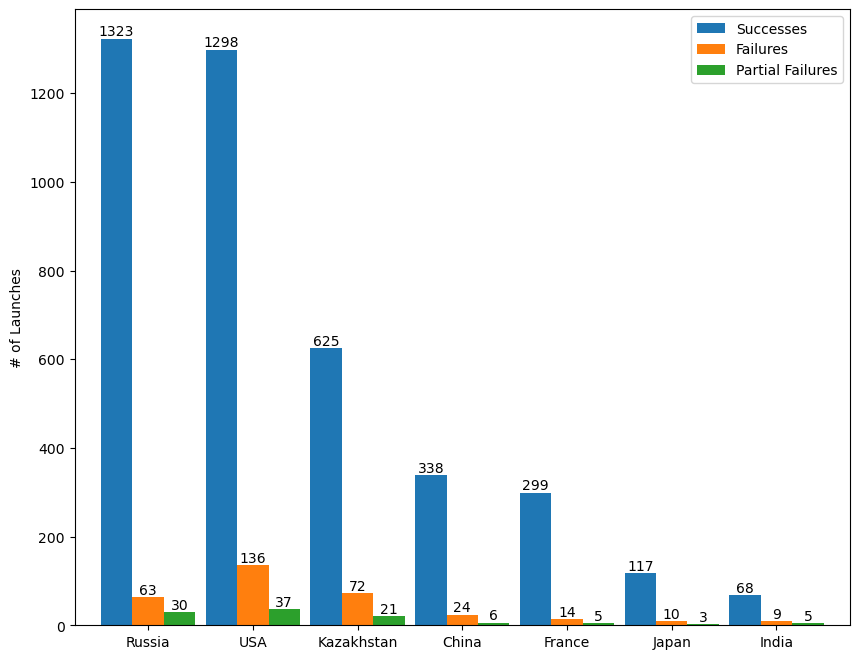

In [47]:
# Create arrays for counts in bar graph

successes = [1323, 1298, 625, 338, 299, 117, 68]
failures = [63, 136, 72, 24, 14, 10, 9]
partial = [30, 37, 21, 6, 5, 3, 5]
prelaunch_fail = [0, 1, 1, 0, 0, 0, 0,]
index = ['Russia', 'USA', 'Kazakhstan', 'China', 'France', 'Japan', 'India']

top_launches = pd.DataFrame({'Successes': successes,
                            'Failures': failures,
                            'Partial Failures': partial}, index=index)

graph = top_launches.plot.bar(rot=0, width=.9, figsize = [10, 8])
graph.bar_label(graph.containers[0], label_type='edge')
graph.bar_label(graph.containers[1], label_type='edge')
graph.bar_label(graph.containers[2], label_type='edge')


plt.ylabel("# of Launches")
plt.savefig("output_data/Fig1.png")

In [8]:
launch_totals = [1323, 1298, 625, 338, 299, 117, 68], [63, 136, 72, 24, 14, 10, 9], [30, 37, 21, 6, 5, 3, 5], [0, 1, 1, 0, 0, 0, 0,]
sum = []
total = 0
for i in launch_totals:
    for j in i:
        total = total + j
        sum.append(total)

print(sum[-1])

4505


In [9]:
# sum rows for each country in DataFrame
Russia = top_launches.iloc[0].sum(axis=0)
USA = top_launches.iloc[1].sum(axis=0)
Kazakhstan = top_launches.iloc[2].sum(axis=0)
China = top_launches.iloc[3].sum(axis=0)
France = top_launches.iloc[4].sum(axis=0)
Japan = top_launches.iloc[5].sum(axis=0)
India = top_launches.iloc[6].sum(axis=0)

print("Total launches for Russia: ", Russia)
print("Total launches for USA: ",USA)
print("Total launches for Kazakhstan: ",Kazakhstan)
print("Total launches for China: ",China)
print("Total launches for France: ",France)
print("Total launches for Japan: ",Japan)
print("Total launches for Indai: ",India)

Total launches for Russia:  1416
Total launches for USA:  1471
Total launches for Kazakhstan:  718
Total launches for China:  368
Total launches for France:  318
Total launches for Japan:  130
Total launches for Indai:  82


In [10]:
# Calculate percentages for each country
top_launches = pd.DataFrame({
    'Successes': successes,
    'Failures': failures,
    'Partial Failures': partial,
    'Prelaunch Failures': prelaunch_fail}, index=index)
# Calculating total launches
top_launches['Total'] = top_launches.sum(axis=1)
# Calculating percentages
top_launches_percentages = top_launches[['Successes', 'Failures', 'Partial Failures',
                                         'Prelaunch Failures']].div(top_launches['Total'], axis=0)*100
print(top_launches_percentages)

            Successes   Failures  Partial Failures  Prelaunch Failures
Russia      93.432203   4.449153          2.118644            0.000000
USA         88.179348   9.239130          2.513587            0.067935
Kazakhstan  86.926287  10.013908          2.920723            0.139082
China       91.847826   6.521739          1.630435            0.000000
France      94.025157   4.402516          1.572327            0.000000
Japan       90.000000   7.692308          2.307692            0.000000
India       82.926829  10.975610          6.097561            0.000000


In [48]:
# Create pie chart for Successes for each country
top_launches.plot.pie(y='Successes', title = "Top 7 Countries Launch Successes", legend = False,
                     autopct='%1.1f%%')
plt.savefig("output_data/Fig2.png")

ValueError: pie requires either y column or 'subplots=True'

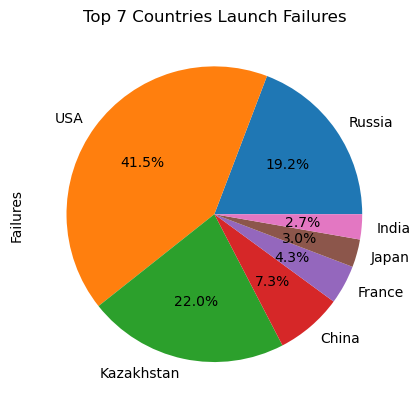

In [12]:
# Create pie chart for Failures for each country
top_launches.plot.pie(y='Failures', title = "Top 7 Countries Launch Failures", legend = False,
                     autopct='%1.1f%%')
plt.savefig("output_data/Fig3.png")

In [13]:
# Make new DataFrame for top 3 countries
top_launches = pd.DataFrame({
    'Successes': successes,
    'Failures': failures,
    'Partial Failures': partial,
    'Prelaunch Failures': prelaunch_fail}, index=index)

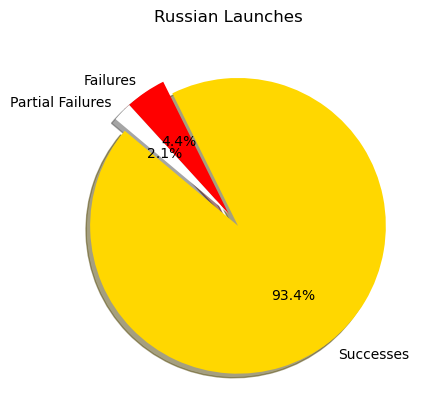

In [14]:
# Create pie chart for Russia's launch data
# Labels for sections of pies chart
labels = ["Successes", "Failures", "Partial Failures"]
# Values for each slice
sizes = [93.432203, 4.449153, 2.118644]
# Colors for each slice
colors = ['gold', 'red', 'white']
# Separate successes
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Russian Launches")
plt.savefig("output_data/Fig4.png")
plt.show()

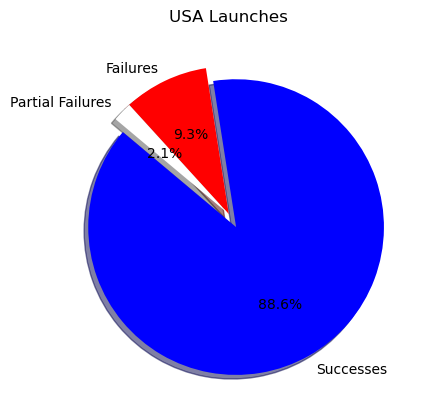

In [15]:
# Create pie chart for Russia's launch data
# Labels for sections of pies chart
labels = ["Successes", "Failures", "Partial Failures"]
# Values for each slice
sizes = [88.179348, 9.239130, 2.118644]             
# Colors for each slice
colors = ['blue', 'red', 'white']
# Separate successes
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("USA Launches")
plt.savefig("output_data/Fig5.png")
plt.show()

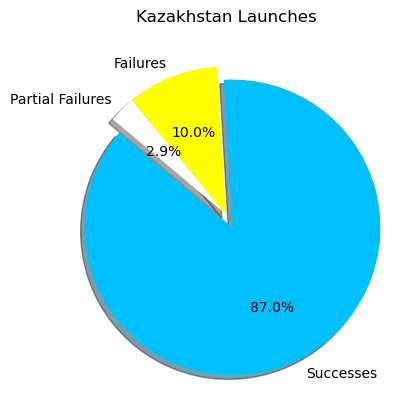

In [16]:
# Create pie chart for Russia's launch data
# Labels for sections of pies chart
labels = ["Successes", "Failures", "Partial Failures"]
# Values for each slice
sizes = [86.926287, 10.013908, 2.920723]                         
# Colors for each slice
colors = ['deepskyblue', 'yellow', 'white']
# Separate successes
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Kazakhstan Launches")
plt.savefig("output_data/Fig6.png")
plt.show()